In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import dataframe_image as dfi

In [2]:
df = pd.read_csv("data_GOOD.csv")
df.drop(columns="result", inplace=True)
df = df[df["LUTs"] != 0]

chunk_size = 20  # number of rows per image

for i in range(0, len(df), chunk_size):
    chunk = df.iloc[i:i+chunk_size]
    dfi.export(chunk, f"df_chunk_{i}.png", table_conversion='chrome')

df

,LUTs,Registers,BRAMs,DSPs,WNS (ns),Total Power (W),Dynamic Power (W),Static Power (W),D,H,int bits,frac bits,MAE,Time Utilization
0,2513,30,0,0,8.585,0.085,0.001,0.084,4,2,4,3,0.066903,0.1415
1,3340,34,0,0,8.553,0.085,0.001,0.084,4,2,4,4,0.037745,0.1447
2,4202,38,0,0,8.368,0.085,0.001,0.084,4,2,4,5,0.017378,0.1632
3,2870,30,0,0,8.561,0.085,0.001,0.084,5,2,4,3,0.069740,0.1439
4,3817,34,0,0,8.570,0.085,0.001,0.084,5,2,4,4,0.033842,0.1430
5,4806,38,0,0,8.498,0.085,0.001,0.084,5,2,4,5,0.018101,0.1502
6,4300,45,0,0,8.459,0.085,0.001,0.084,4,3,4,3,0.100737,0.1541
7,5726,51,0,0,8.589,0.085,0.001,0.084,4,3,4,4,0.046971,0.1411
8,7202,57,0,0,8.204,0.086,0.002,0.084,4,3,4,5,0.020700,0.1796
9,4840,45,0,0,8.504,0.085,0.002,0.084,5,3,4,3,0.092292,0.1496


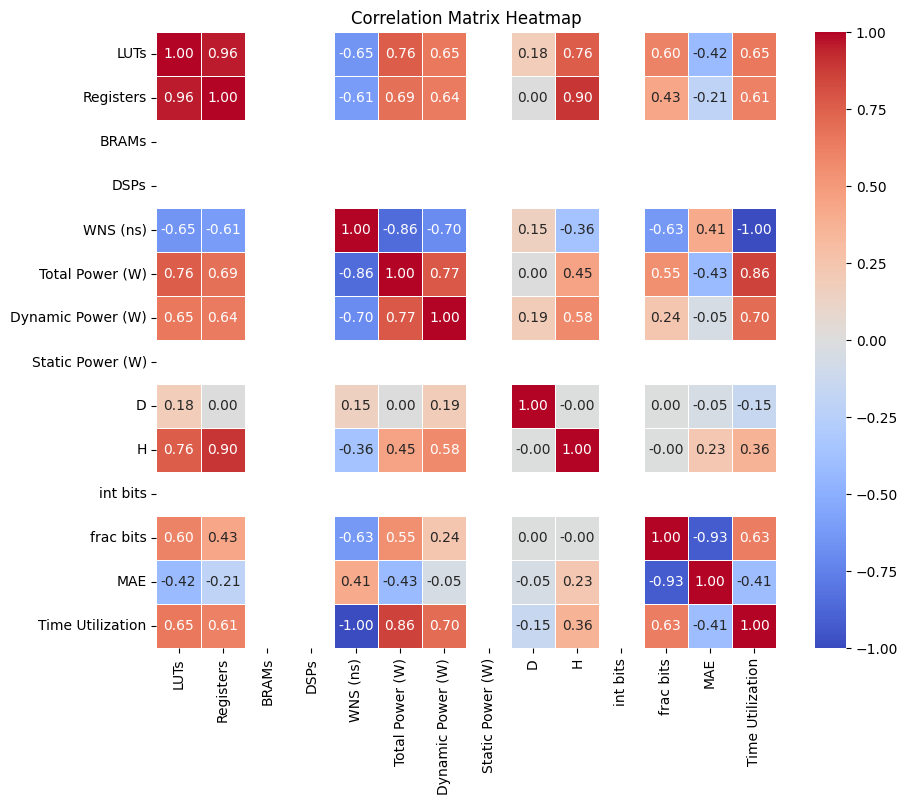

<Figure size 640x480 with 0 Axes>

In [3]:
corr = df.corr()

# Set up the plot
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(
    corr,
    annot=True,          # show correlation values
    fmt=".2f",           # format numbers
    cmap="coolwarm",     # color palette
    linewidths=0.5
)

plt.title("Correlation Matrix Heatmap")
plt.show()
plt.savefig("corr_matrix.png")

In [4]:
desc = df.describe()
dfi.export(desc, "describe_output.png", table_conversion='chrome')
desc

,LUTs,Registers,BRAMs,DSPs,WNS (ns),Total Power (W),Dynamic Power (W),Static Power (W),D,H,int bits,frac bits,MAE,Time Utilization
count,12.000000,12.000000,12.0,12.0,12.000000,12.000000,12.000000,12.000,12.000000,12.000000,12.0,12.000000,12.000000,12.000000
mean,4846.083333,42.500000,0.0,0.0,8.478417,0.085167,0.001250,0.084,4.500000,2.500000,4.0,4.000000,0.047019,0.152158
std,1727.770263,9.885711,0.0,0.0,0.126873,0.000389,0.000452,0.000,0.522233,0.522233,0.0,0.852803,0.029041,0.012687
min,2513.000000,30.000000,0.0,0.0,8.204000,0.085000,0.001000,0.084,4.000000,2.000000,4.0,3.000000,0.017378,0.141100
25%,3697.750000,34.000000,0.0,0.0,8.436250,0.085000,0.001000,0.084,4.000000,2.000000,4.0,3.000000,0.020648,0.143525
50%,4553.000000,41.500000,0.0,0.0,8.528500,0.085000,0.001000,0.084,4.500000,2.500000,4.0,4.000000,0.038534,0.147150
75%,5903.500000,51.000000,0.0,0.0,8.564750,0.085000,0.001250,0.084,5.000000,3.000000,4.0,5.000000,0.067612,0.156375
max,8101.000000,57.000000,0.0,0.0,8.589000,0.086000,0.002000,0.084,5.000000,3.000000,4.0,5.000000,0.100737,0.179600


C:\Users\ajrbe\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\ajrbe\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


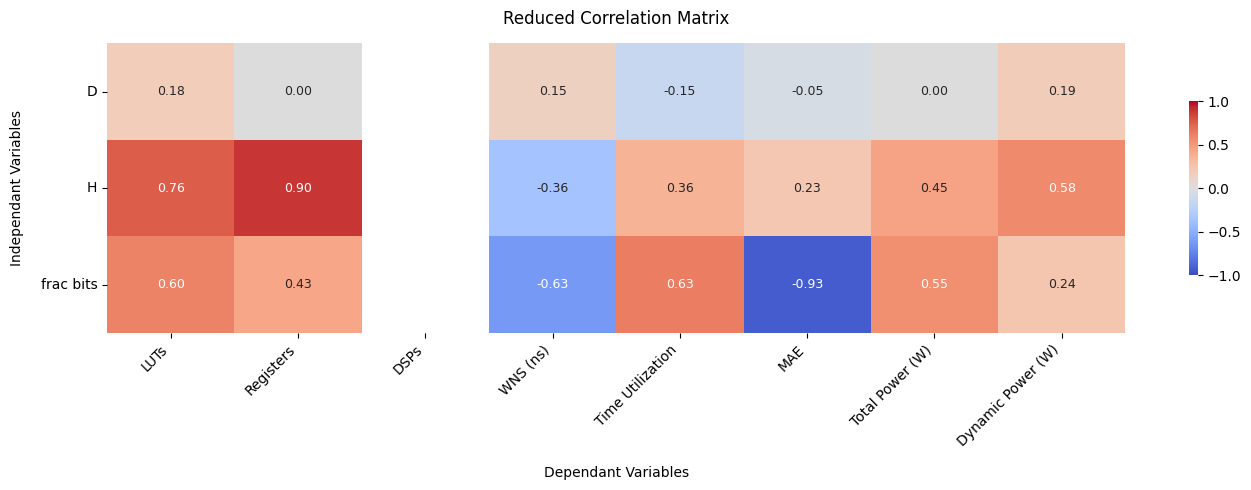

In [5]:
set_bottom = ['LUTs', 'Registers', 'DSPs', 'WNS (ns)', 'Time Utilization', 'MAE',
              'Total Power (W)', 'Dynamic Power (W)']
set_right = ['D', 'H', 'frac bits']

A = df[set_right].values
B = df[set_bottom].values

corr = np.corrcoef(A.T, B.T)
corr_mat = corr[:len(set_right), len(set_right):]

corr_df = pd.DataFrame(corr_mat, index=set_right, columns=set_bottom)

# Create figure and axes
fig, ax = plt.subplots(figsize=(14, 5))   # wider figure to fit long x-labels

# Plot heatmap
sns.heatmap(
    corr_df,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    ax=ax,
    cbar_kws={"shrink": 0.6},
    annot_kws={"fontsize": 9}              # reduce annotation font size if crowded
)

# Tweak tick labels so they don't get cut off
ax.set_xlabel("Dependant Variables", labelpad=12)
ax.set_ylabel("Independant Variables", labelpad=12)
ax.set_title("Reduced Correlation Matrix", pad=14)

# Rotate and right-align x tick labels (long names)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

# Optionally reduce x tick label font size if still crowded
for tick in ax.get_xticklabels():
    tick.set_fontsize(10)

# Tight layout and save without clipping
plt.tight_layout()
plt.savefig("reduced_corr_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

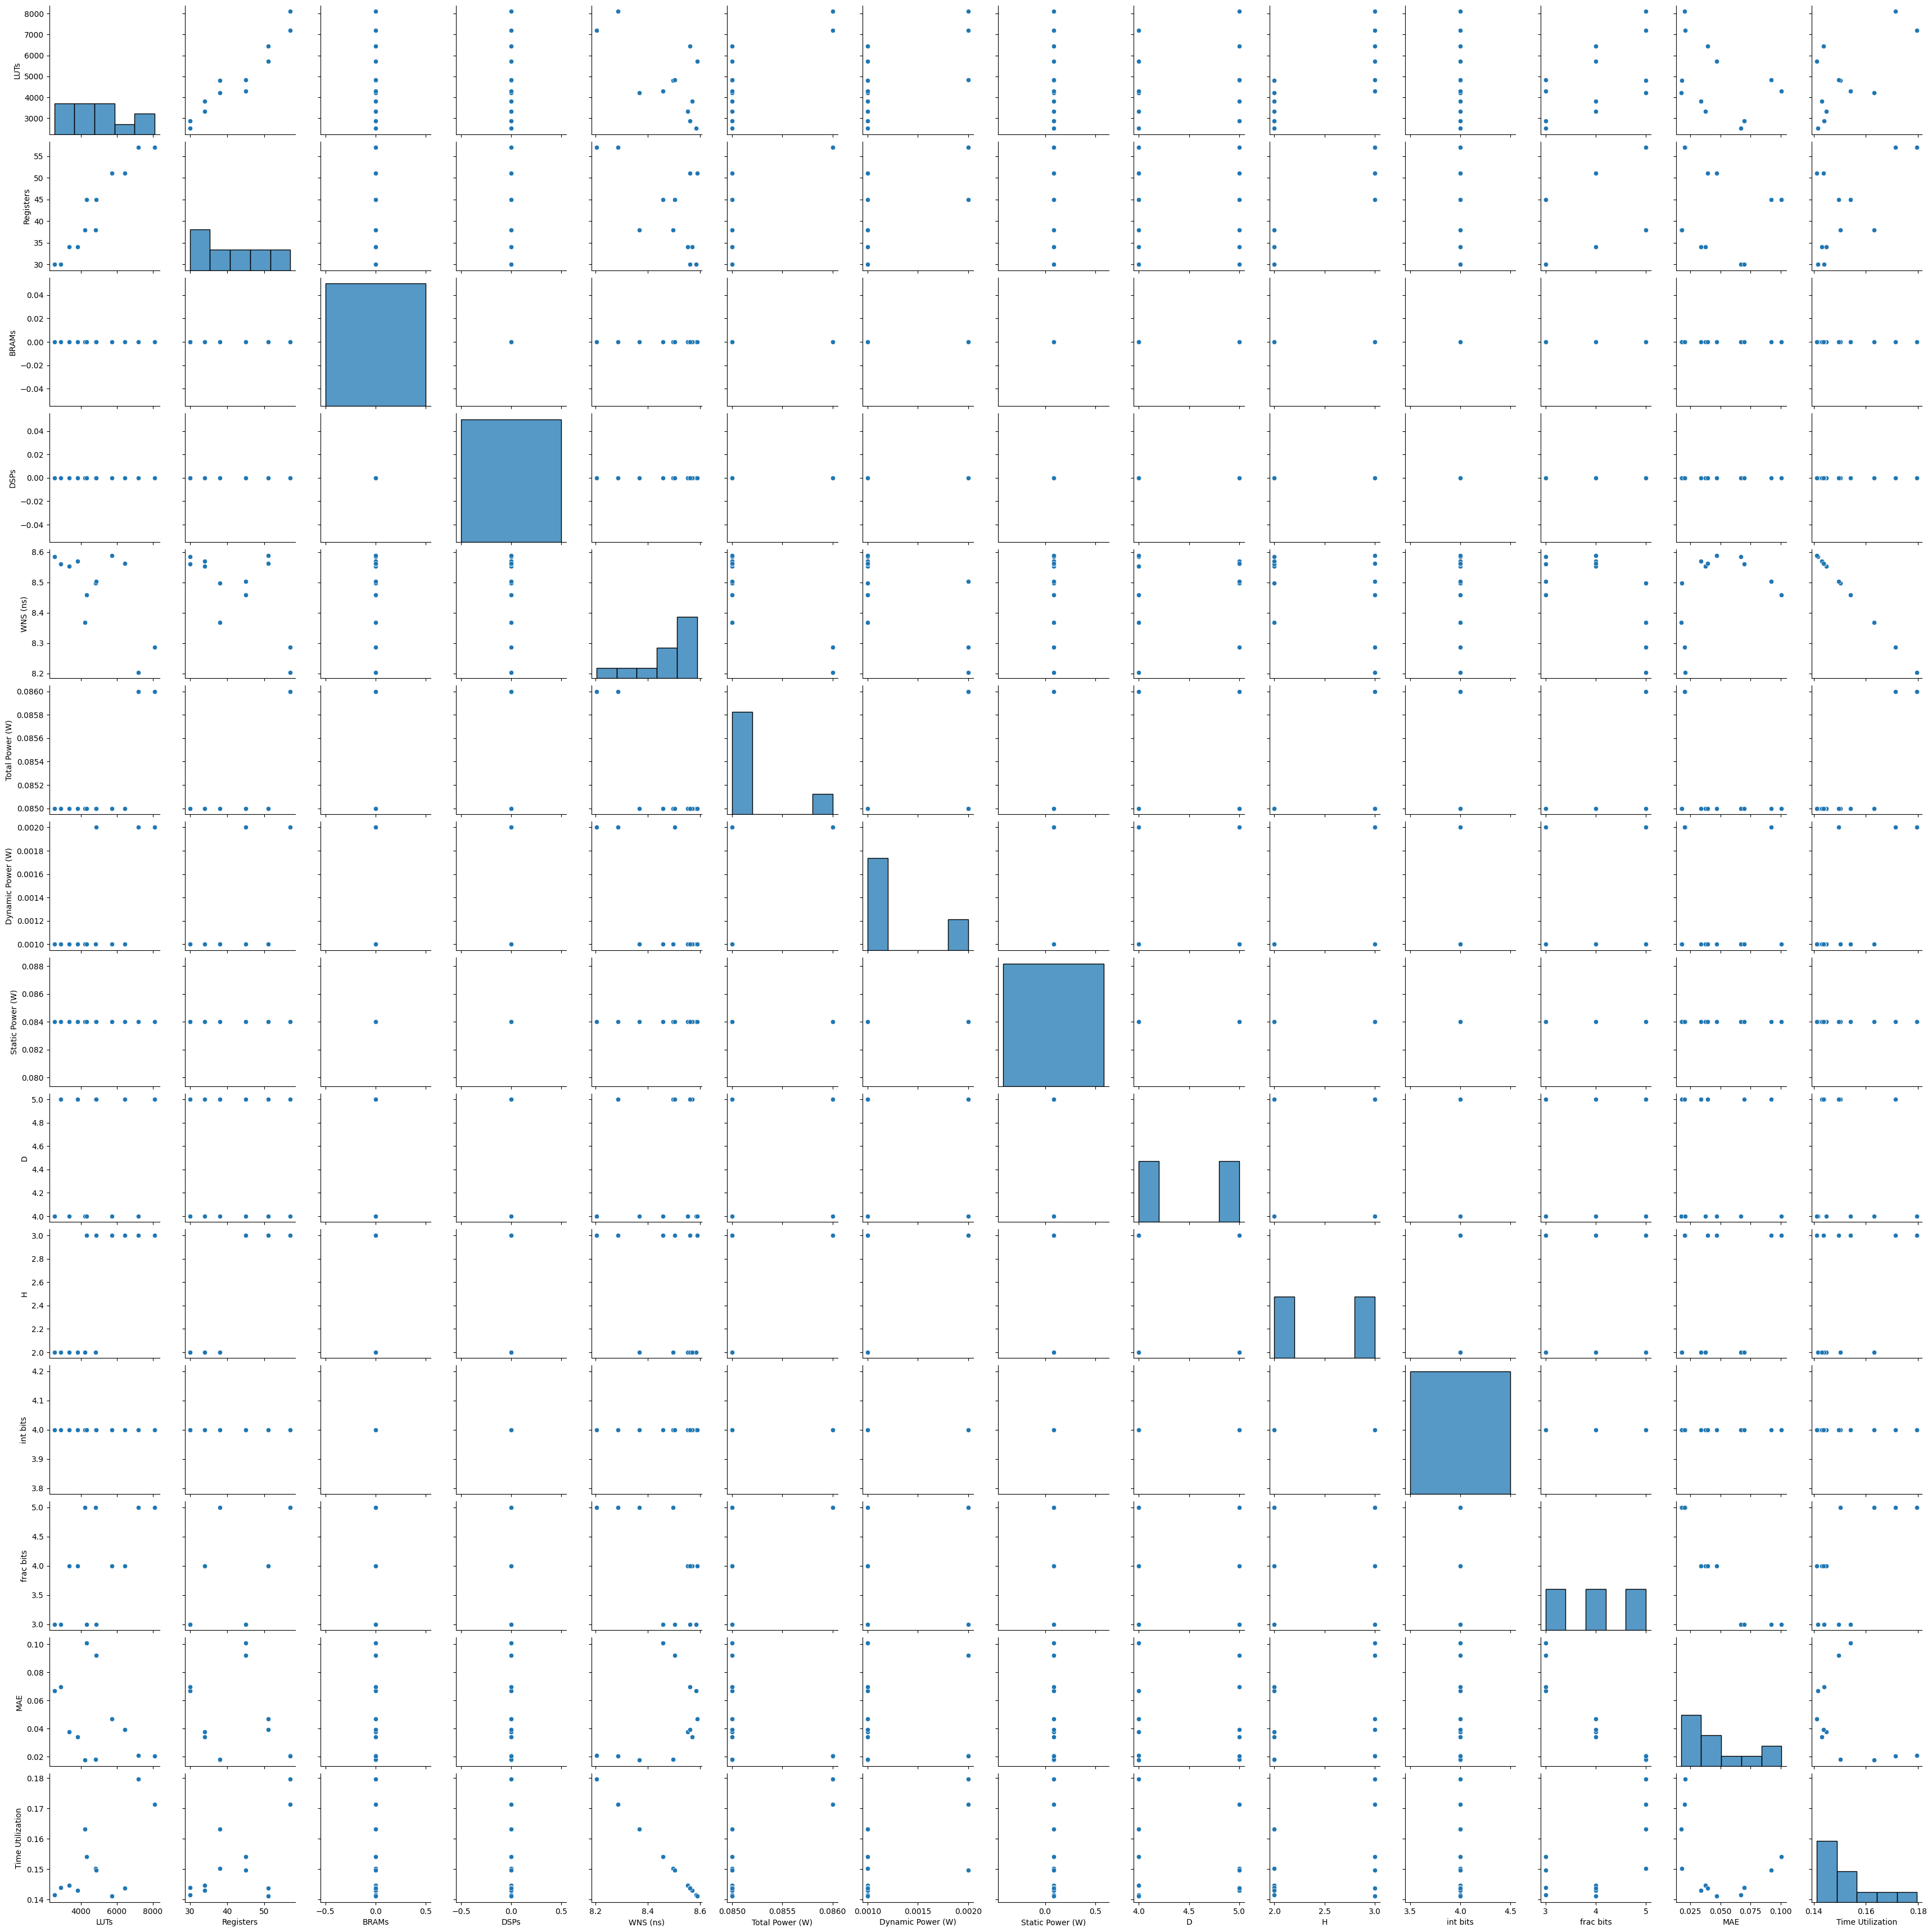

In [6]:
sns.pairplot(df)

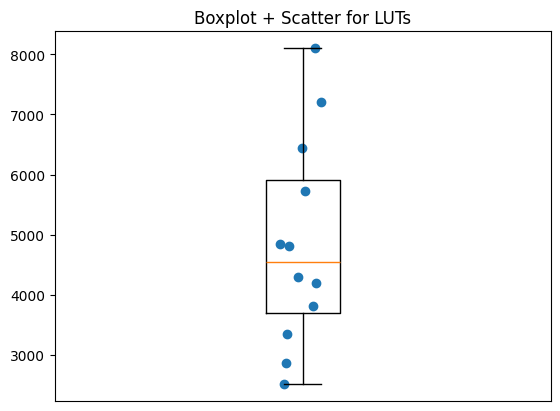

<Figure size 640x480 with 0 Axes>

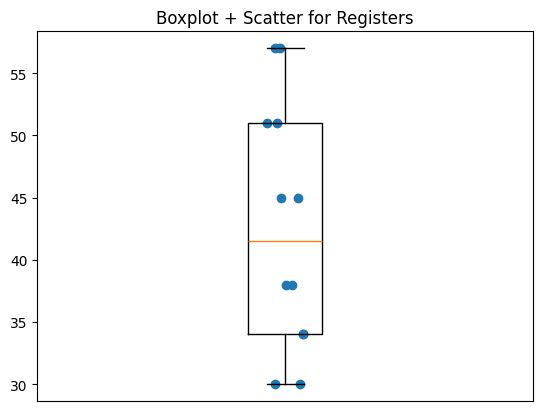

<Figure size 640x480 with 0 Axes>

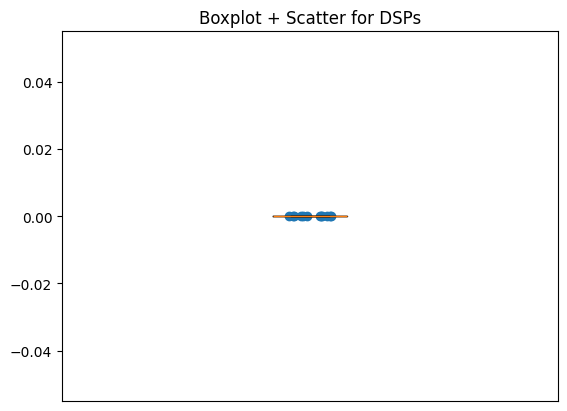

<Figure size 640x480 with 0 Axes>

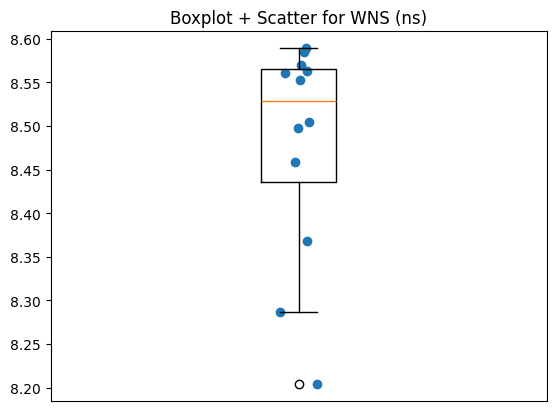

<Figure size 640x480 with 0 Axes>

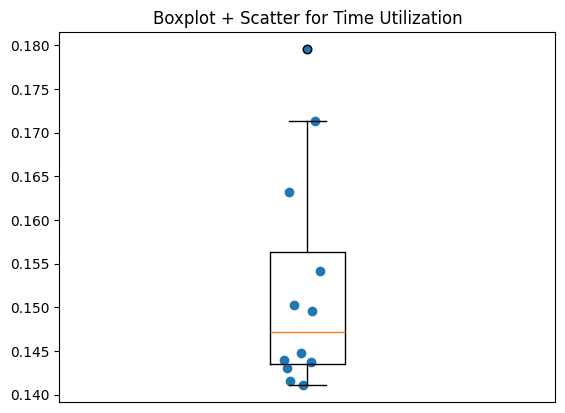

<Figure size 640x480 with 0 Axes>

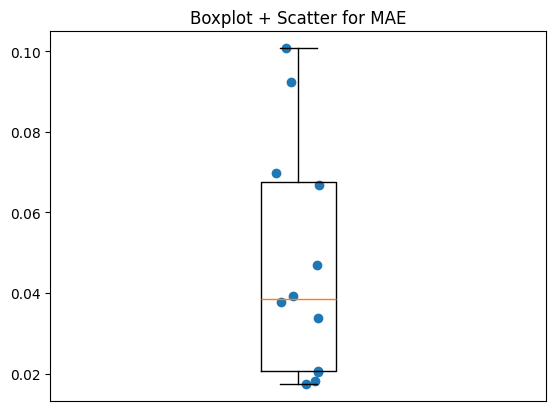

<Figure size 640x480 with 0 Axes>

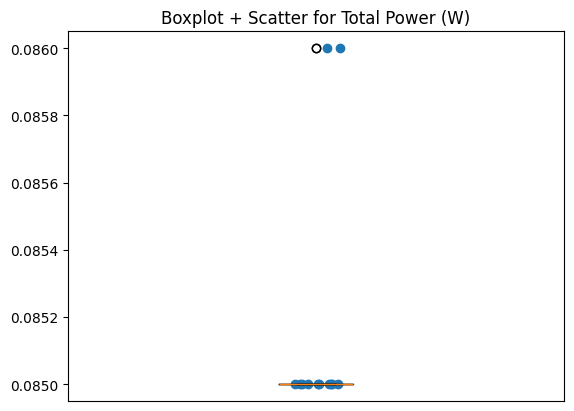

<Figure size 640x480 with 0 Axes>

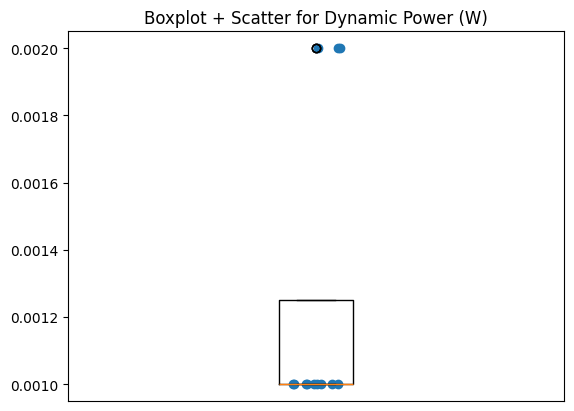

<Figure size 640x480 with 0 Axes>

In [8]:
columns = ['LUTs', 'Registers', 'DSPs', 'WNS (ns)', 'Time Utilization', 'MAE',
              'Total Power (W)', 'Dynamic Power (W)']

for col in columns:
    data = df[col].dropna()

    fig, ax = plt.subplots()

    # Boxplot
    ax.boxplot(data, positions=[0])

    # Jitter scatter points so they don't overlap
    jitter = np.random.uniform(-0.05, 0.05, size=len(data))
    ax.scatter(jitter, data)

    # Clean axis labels
    ax.set_title(f"Boxplot + Scatter for {col}")
    ax.set_xticks([])

    plt.show()
    plt.savefig(f"boxplot_{col}.png", dpi=300, bbox_inches="tight")